**Assignment 4**
**E-mail Classification**

Submitted by: Syed Hasib Akhter Faruqui

email: shafnehal@gmail.com

-----------------------------------------------------------------------------------------
**Email Classification Using Machine Learning**

Natural Language Processing (NLP) for spam filtraton is one of the common problems that is being introduced in order to enhance online security. The idea behind this assignment is - given an email that was not used to train the network, we have to determine weather it is a spam or Ham (not Spam). 

For the problem assigned, we have been provided with a collection of sample emails (i.e. a text corpus). In this corpus, each email has already been labeled as Spam or Ham. 

During the training phase, we present these emails and their labels to the program. For each email, the program says whether it thought the email was Spam or Ham. After the program makes a prediction, we tell the program what the label of the email actually was. The network then adjusts its weights so as to make a better prediction the next time around. This process is done iteratively until either the program can’t do any better or we get to a threshold or desired target accuracy.

We have two parts in the code-

a) Given Dataset-

   1)What's the best accuracy you get on the test dataset?
    
   2)What's the optimum value of the numEpochs and the learningRate.
    
   3)Plot the error with Matplotlib
    
b) add new neural network layers and training the model again. comapre the error function between these two models.

** (a) Initial Code**

In [1]:
#Import Module
#Import Packages
from __future__ import division
import tensorflow as tf
import numpy as np
import tarfile
import os
import matplotlib.pyplot as plt
import time
get_ipython().magic('matplotlib inline')
%matplotlib inline

In [2]:
#Import Data
def csv_to_numpy_array(filePath, delimiter):
    return np.genfromtxt(filePath, delimiter=delimiter, dtype=None)

def import_data():
    if "data" not in os.listdir(os.getcwd()):
        # Untar directory of data if we haven't already
        tarObject = tarfile.open("data.tar.gz")
        tarObject.extractall()
        tarObject.close()
        print("Extracted tar to current directory")
    else:
        # we've already extracted the files
        pass

    print("loading training data")
    trainX = csv_to_numpy_array("data/trainX.csv", delimiter="\t")
    trainY = csv_to_numpy_array("data/trainY.csv", delimiter="\t")
    print("loading test data")
    testX = csv_to_numpy_array("data/testX.csv", delimiter="\t")
    testY = csv_to_numpy_array("data/testY.csv", delimiter="\t")
    return trainX,trainY,testX,testY

trainX,trainY,testX,testY = import_data()

loading training data
loading test data


In [3]:
#Initial Parametres
# Number of words extracted from each email
numFeatures = trainX.shape[1]
# Number of classes for predicting
numLabels = trainY.shape[1]

#Runtime parametres
numEpochs = 35000
learningRate = tf.train.exponential_decay(learning_rate=0.0006,
                                          global_step= 1,
                                          decay_steps=trainX.shape[0],
                                          decay_rate= 0.95,
                                          staircase=True)

In [4]:
#PlaceHolders
X = tf.placeholder(tf.float32, [None, numFeatures])   # Hold Email Data
yGold = tf.placeholder(tf.float32, [None, numLabels]) # Hold Response Data/Labels

#Weights
weights = tf.Variable(tf.random_normal([numFeatures,numLabels],
                                       mean=0,
                                       stddev=(np.sqrt(6/numFeatures+
                                                         numLabels+1)),
                                       name="weights"))

#Biases
bias = tf.Variable(tf.random_normal([1,numLabels],
                                    mean=0,
                                    stddev=(np.sqrt(6/numFeatures+numLabels+1)),
                                    name="bias"))

In [5]:
#Tensorflow Graph
# initialize variables
init_OP = tf.initialize_all_variables()
# define feedforward algorithm
apply_weights_OP = tf.matmul(X, weights, name="apply_weights")
add_bias_OP = tf.add(apply_weights_OP, bias, name="add_bias") 
activation_OP = tf.nn.sigmoid(add_bias_OP, name="activation")

#cost function and Optimization
cost_OP = tf.nn.l2_loss(activation_OP-yGold, name="squared_error_cost")
training_OP = tf.train.GradientDescentOptimizer(learningRate).minimize(cost_OP)

step 0, training accuracy 0.5383
step 0, cost 251.633
step 0, change in cost 251.633
step 1000, training accuracy 0.583421
step 1000, cost 234.204
step 1000, change in cost 17.4287
step 2000, training accuracy 0.637985
step 2000, cost 226.762
step 2000, change in cost 7.442
step 3000, training accuracy 0.673662
step 3000, cost 219.727
step 3000, change in cost 7.03482
step 4000, training accuracy 0.712487
step 4000, cost 213.091
step 4000, change in cost 6.636
step 5000, training accuracy 0.759706
step 5000, cost 206.839
step 5000, change in cost 6.25197
step 6000, training accuracy 0.78489
step 6000, cost 200.951
step 6000, change in cost 5.8878
step 7000, training accuracy 0.802728
step 7000, cost 195.406
step 7000, change in cost 5.54581
step 8000, training accuracy 0.838405
step 8000, cost 190.179
step 8000, change in cost 5.2269
step 9000, training accuracy 0.871983
step 9000, cost 185.248
step 9000, change in cost 4.93062
step 10000, training accuracy 0.884575
step 10000, cost 18

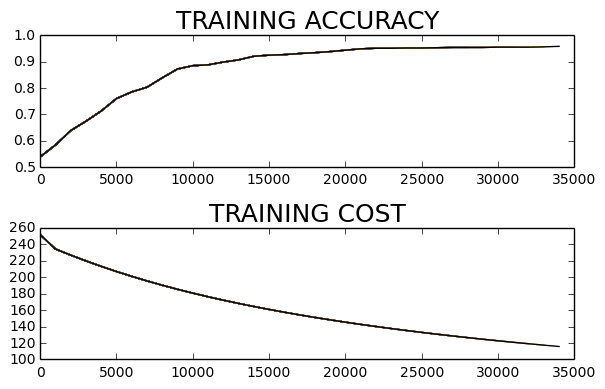

In [6]:
# Live Plotting
epoch_values=[]
accuracy_values=[]
cost_values=[]
# Turn on interactive plotting
plt.ion()
# Create the main, super plot
fig = plt.figure()
# Create two subplots on their own axes and give titles
ax1 = plt.subplot("211")
ax1.set_title("TRAINING ACCURACY", fontsize=18)
ax2 = plt.subplot("212")
ax2.set_title("TRAINING COST", fontsize=18)
plt.tight_layout()

#Running the Graph

# Create a tensorflow session
sess = tf.Session()
# Initialize all tensorflow variables
sess.run(init_OP)

## Ops for vizualization
# argmax(activation_OP, 1) gives the label our model thought was most likely
# argmax(yGold, 1) is the correct label
correct_predictions_OP = tf.equal(tf.argmax(activation_OP,1),tf.argmax(yGold,1))
# False is 0 and True is 1, what was our average?
accuracy_OP = tf.reduce_mean(tf.cast(correct_predictions_OP, "float"))
# Summary op for regression output
activation_summary_OP = tf.histogram_summary("output", activation_OP)
# Summary op for accuracy
accuracy_summary_OP = tf.scalar_summary("accuracy", accuracy_OP)
# Summary op for cost
cost_summary_OP = tf.scalar_summary("cost", cost_OP)
# Summary ops to check how variables (W, b) are updating after each iteration
weightSummary = tf.histogram_summary("weights", weights.eval(session=sess))
biasSummary = tf.histogram_summary("biases", bias.eval(session=sess))
# Merge all summaries
all_summary_OPS = tf.merge_all_summaries()
# Summary writer
writer = tf.train.SummaryWriter("summary_logs", sess.graph_def)

# Initialize reporting variables
cost = 0
diff = 1

# Training epochs
for i in range(numEpochs):
    if i > 1 and diff < .0001:
        print("change in cost %g; convergence."%diff)
        break
    else:
        # Run training step
        step = sess.run(training_OP, feed_dict={X: trainX, yGold: trainY})
        # Report occasional stats
        if i % 1000 == 0:
            # Add epoch to epoch_values
            epoch_values.append(i)
            # Generate accuracy stats on test data
            summary_results, train_accuracy, newCost = sess.run(
                [all_summary_OPS, accuracy_OP, cost_OP], 
                feed_dict={X: trainX, yGold: trainY}
            )
            # Add accuracy to live graphing variable
            accuracy_values.append(train_accuracy)
            # Add cost to live graphing variable
            cost_values.append(newCost)
            # Write summary stats to writer
            writer.add_summary(summary_results, i)
            # Re-assign values for variables
            diff = abs(newCost - cost)
            cost = newCost

            #generate print statements
            print("step %d, training accuracy %g"%(i, train_accuracy))
            print("step %d, cost %g"%(i, newCost))
            print("step %d, change in cost %g"%(i, diff))

            # Plot progress to our two subplots
            accuracyLine, = ax1.plot(epoch_values, accuracy_values)
            costLine, = ax2.plot(epoch_values, cost_values)
            fig.canvas.draw()
            time.sleep(1)


# How well do we perform on held-out test data?
print("final accuracy on test set: %s" %str(sess.run(accuracy_OP, 
                                                     feed_dict={X: testX, 
                                                                yGold: testY})))


In [7]:
# Create Saver
saver = tf.train.Saver()
# Save variables to .ckpt file
saver.save(sess, "trained_variables_initial.ckpt")

# Close tensorflow session
sess.close()

**Different Experimental Results**

a)**Setting 1**

Learning Rate=0.0008

num of Epocs=35,000

Final Accuracy= 0.92381

b)**Setting 2**

Learning Rate=0.0007

num of Epocs=35,000

Final Accuracy= 0.90476

a)**Setting 3**

Learning Rate=0.0006

num of Epocs=35,000

Final Accuracy= 0.91428

** (b)After Adding a Layer **

In [8]:
numH=10     #Number of Hidden Layers

#Variables
weights12 = tf.Variable(tf.random_normal([numFeatures,numH],
                                       mean=0,
                                       stddev=(np.sqrt(6/numFeatures+
                                                         numH+1)),
                                       name="weights12"))

bias_hidden = tf.Variable(tf.random_normal([1,numH],
                                    mean=0,
                                    stddev=(np.sqrt(6/numFeatures+numLabels+1)),
                                    name="bias_hidden"))

weights23 = tf.Variable(tf.random_normal([numH,numLabels],
                                       mean=0,
                                       stddev=(np.sqrt(6/numH+
                                                         numLabels+1)),
                                       name="weights23"))

bias_out = tf.Variable(tf.random_normal([1,numLabels],
                                    mean=0,
                                    stddev=(np.sqrt(6/numFeatures+numLabels+1)),
                                    name="bias_out"))


# Initialization
init_OP = tf.initialize_all_variables()


#Layer addition
apply_weights1 = tf.matmul(X, weights12, name="apply_weights")
add_bias1 = tf.add(apply_weights1, bias_hidden, name="add_bias")
activation1 = tf.nn.sigmoid(add_bias1, name="activation")

apply_weights_OP = tf.matmul(activation1, weights23, name="apply_weights2")
add_bias_OP = tf.add(apply_weights_OP, bias_out, name="add_bias2")
activation_OP = tf.nn.sigmoid(add_bias_OP, name="activation2")


# Cost Function and Optimization
cost_OP = tf.nn.l2_loss(activation_OP-yGold, name="squared_error_cost")
training_OP = tf.train.GradientDescentOptimizer(learningRate).minimize(cost_OP)

epoch_values=[]
accuracy_values=[]
cost_values=[]

# Create a tensorflow session
sess = tf.Session()

# Initialize all tensorflow variables
sess.run(init_OP)
correct_predictions_OP = tf.equal(tf.argmax(activation_OP,1),tf.argmax(yGold,1))
accuracy_OP = tf.reduce_mean(tf.cast(correct_predictions_OP, "float"))
cost = 0
diff = 1

# Training epochs
for i in range(numEpochs):
    if i > 1 and diff < .0001:
        print("change in cost %g; convergence."%diff)
        break
    else:
        # Run training step
        step = sess.run(training_OP, feed_dict={X: trainX, yGold: trainY})
        # Report occasional stats
        if i % 10 == 0:
            # Add epoch to epoch_values
            epoch_values.append(i)
            # Generate accuracy stats on test data
            train_accuracy, newCost = sess.run(
                [accuracy_OP, cost_OP],
                feed_dict={X: trainX, yGold: trainY}
            )
            # Add accuracy to live graphing variable
            accuracy_values.append(train_accuracy)
            # Add cost to live graphing variable
            cost_values.append(newCost)
            # Write summary stats to writer
            #writer.add_summary(summary_results, i)
            # Re-assign values for variables
            diff = abs(newCost - cost)
            cost = newCost

            #generate print statements
            if i % 1000 == 0:
                print("step %d, training accuracy %g"%(i, train_accuracy))
                print("step %d, cost %g"%(i, newCost))
                print("step %d, change in cost %g"%(i, diff))

          
            #time.sleep(1)


# How well do we perform on held-out test data?
print("final accuracy on test set: %s" %str(sess.run(accuracy_OP,
                                                     feed_dict={X: testX,
                                                                yGold: testY})))


step 0, training accuracy 0.607555
step 0, cost 260.437
step 0, change in cost 260.437
step 1000, training accuracy 0.697796
step 1000, cost 201.704
step 1000, change in cost 0.339005
step 2000, training accuracy 0.775446
step 2000, cost 166.993
step 2000, change in cost 0.347504
step 3000, training accuracy 0.832109
step 3000, cost 133.922
step 3000, change in cost 0.304108
step 4000, training accuracy 0.875131
step 4000, cost 107.248
step 4000, change in cost 0.232536
step 5000, training accuracy 0.902413
step 5000, cost 86.8823
step 5000, change in cost 0.177498
step 6000, training accuracy 0.927597
step 6000, cost 71.4318
step 6000, change in cost 0.133659
step 7000, training accuracy 0.943337
step 7000, cost 59.85
step 7000, change in cost 0.100014
step 8000, training accuracy 0.951731
step 8000, cost 51.1505
step 8000, change in cost 0.075634
step 9000, training accuracy 0.959077
step 9000, cost 44.5049
step 9000, change in cost 0.0584946
step 10000, training accuracy 0.964323
st

In [9]:
# Create Saver
saver = tf.train.Saver()
# Save variables to .ckpt file
saver.save(sess, "trained_variables_new.ckpt")

# Close tensorflow session
sess.close()

Adding an additional Layer Increased the accuracy in comparision to initial state.